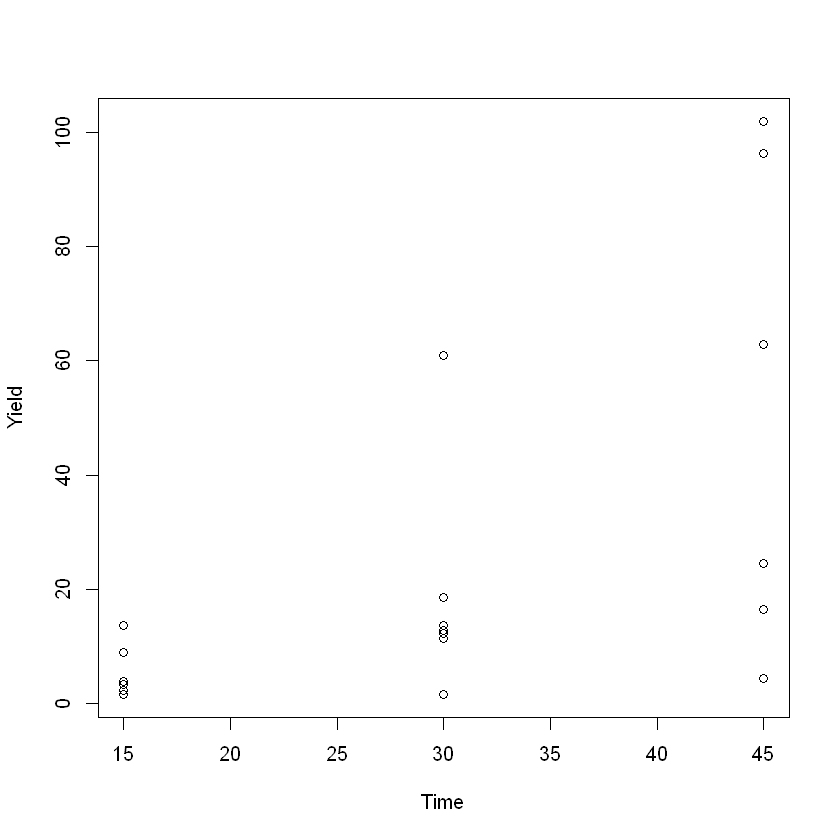


Call:
glm(formula = Yield ~ Time, family = gaussian(link = "inverse"), 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-46.845   -7.784   -3.919    3.123   50.755  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept)  0.145935   0.093478   1.561    0.137
Time        -0.002809   0.002085  -1.347    0.196

(Dispersion parameter for gaussian family taken to be 667.9073)

    Null deviance: 17848  on 18  degrees of freedom
Residual deviance: 11355  on 17  degrees of freedom
AIC: 181.39

Number of Fisher Scoring iterations: 7


1 
29.79662

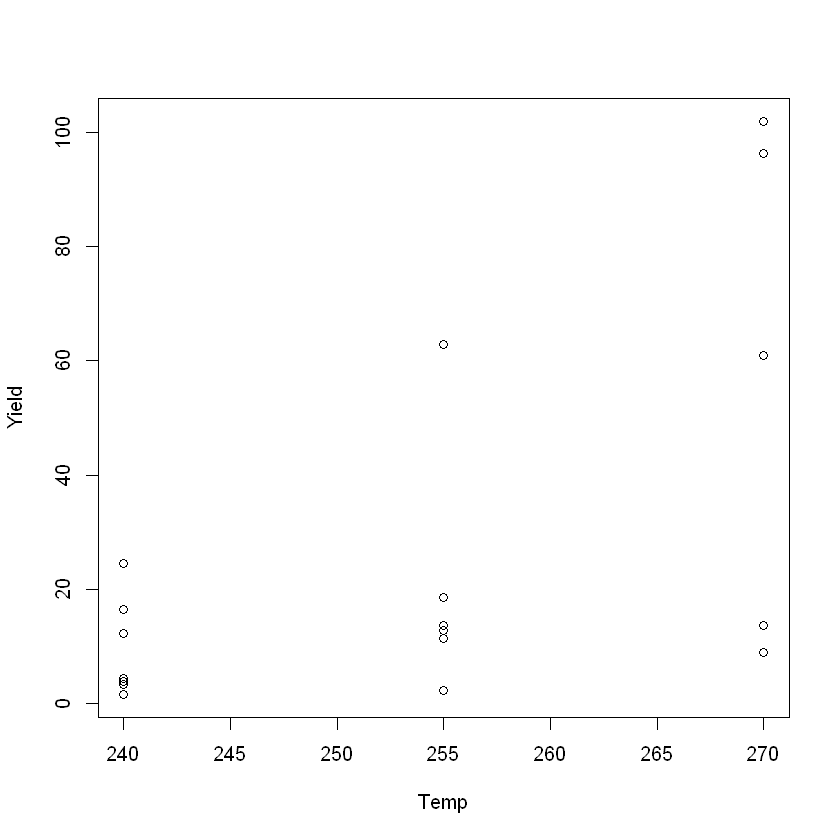

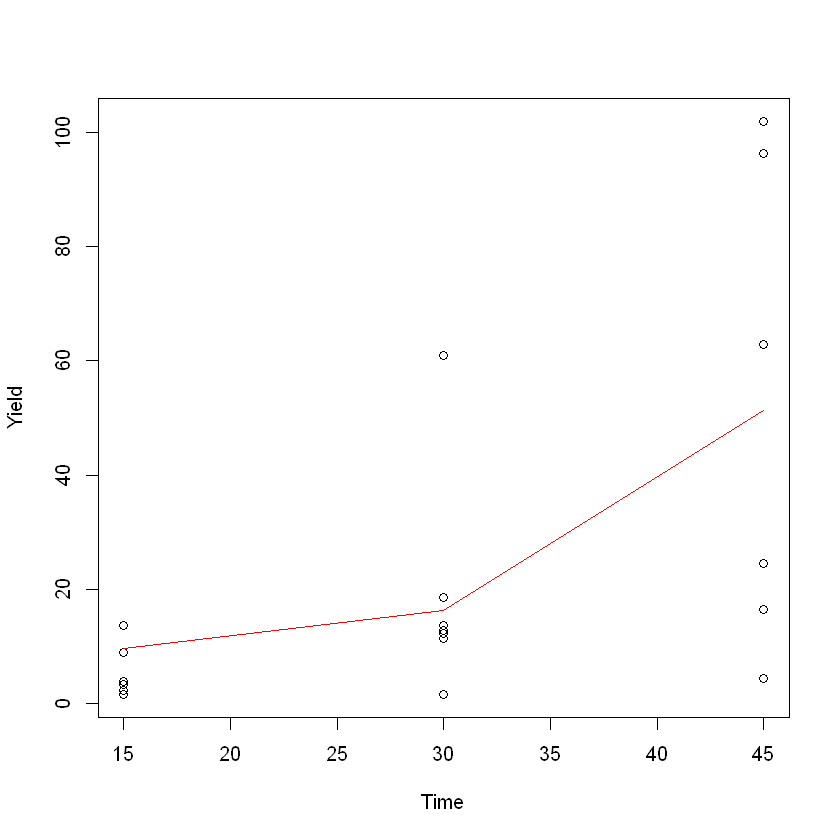

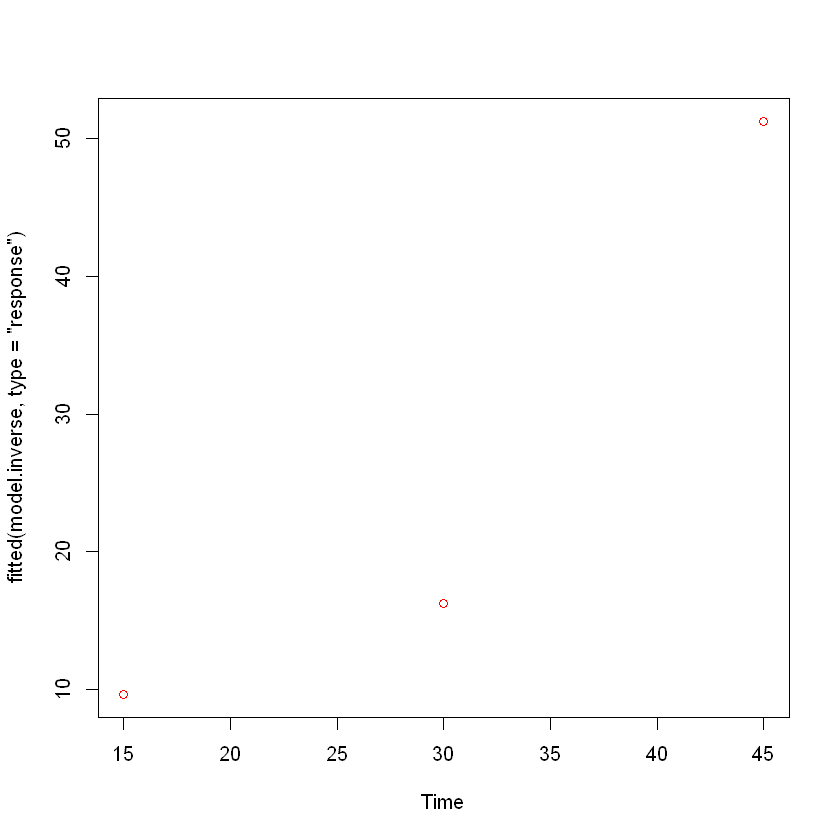

In [1]:
### Assignment 2

# 1
### Generalized Linear Models

data<-read.table("canoladiesel.txt", sep="\t", dec=".", header=TRUE)
attach(data)


# a)
# plot explanatory variables against response variable
# to have some hints on how they behave
plot(Time, Yield)
plot(Temp, Yield)

model.inverse<-glm(Yield~Time, family=gaussian(link="inverse"), data=data)
summary(model.inverse)

predict(model.inverse, newdata=data.frame(Time=40), type="response")
# 1 
# 29.79662 

plot(Time, Yield)
lines(Time,fitted(model.inverse, type="response"), col="red")
plot(Time, fitted(model.inverse, type="response"), col="red")

In [3]:
model.gamma.identity<-glm(Yield~Time, family=Gamma(link="identity"), data=data)
summary(model.gamma.identity)

model.gamma.inverse<-glm(Yield~Time, family=Gamma(link="inverse"), data=data)
summary(model.gamma.inverse)

model.gamma.log<-glm(Yield~Time, family=Gamma(link="log"), data=data)
summary(model.gamma.log)

## AIC - Akaike Information Criterion

AIC(model.gamma.identity)
AIC(model.gamma.inverse)
AIC(model.gamma.log)


Call:
glm(formula = Yield ~ Time, family = Gamma(link = "identity"), 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9092  -0.7154  -0.4941   0.4903   1.1201  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) -12.9124     6.4716  -1.995  0.06230 . 
Time          1.2197     0.3798   3.211  0.00512 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Gamma family taken to be 0.7932588)

    Null deviance: 28.306  on 18  degrees of freedom
Residual deviance: 15.683  on 17  degrees of freedom
AIC: 152.5

Number of Fisher Scoring iterations: 6



Call:
glm(formula = Yield ~ Time, family = Gamma(link = "inverse"), 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7801  -0.8994  -0.1391   0.2191   1.9167  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept)  0.174318   0.055767   3.126  0.00615 **
Time        -0.003460   0.001278  -2.708  0.01493 * 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Gamma family taken to be 1.012042)

    Null deviance: 28.306  on 18  degrees of freedom
Residual deviance: 16.475  on 17  degrees of freedom
AIC: 153.56

Number of Fisher Scoring iterations: 6



Call:
glm(formula = Yield ~ Time, family = Gamma(link = "log"), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7750  -0.7586  -0.3335   0.3196   1.5695  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.63976    0.56068   1.141 0.269677    
Time         0.07410    0.01737   4.266 0.000521 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Gamma family taken to be 0.8144945)

    Null deviance: 28.306  on 18  degrees of freedom
Residual deviance: 15.119  on 17  degrees of freedom
AIC: 151.72

Number of Fisher Scoring iterations: 6


[1] 152.502

[1] 153.5631

[1] 151.7177

In [4]:
# MSE values
mean(residuals(model.gamma.identity, type="response")^2)
mean(residuals(model.gamma.inverse, type="response")^2)
mean(residuals(model.gamma.log, type="response")^2)


[1] 625.4703

[1] 601.9401

[1] 591.9769

In [5]:
# c)


model.123gamma<-glm(Yield~Time+Temp+Methanol, family=Gamma(link="log"), data=data)
summary(model.123gamma)

newdata<-data.frame(Time=40, Temp=260, Methanol=1.75)
predict(model.123gamma, newdata=newdata, type="response")

# 1 
# 51.30597 

predict(model.123gamma, newdata=newdata, type="response", interval="prediction", level=0.8)
# We get the same result when we don't use prediction interval because it does not have effect in glm
# 1 
# 51.30597

eta.hat<-predict(model.123gamma, newdata=newdata, type="link") # 3.937807
xf<-t(cbind(1,newdata))
# > t(xf)%*%coef(model.123gamma)
# [,1]
# [1,] 3.937807

# > exp(3.937807)
# [1] 51.30596

# 0.3196688 same as point prediction

cov.eta<-as.numeric(t(xf)%*%vcov(model.123gamma)%*%xf)
eta.star<-rnorm(1000, mean=eta.hat, sd=sqrt(cov.eta))

mu.star<-exp(eta.star) # inverse of log-link
var.star<-summary(model.123gamma)$dispersion*mu.star^2
a.star<-(mu.star^2)/var.star
s.star<-var.star/mu.star
yf.star<-rgamma(100000, shape=a.star,scale=s.star)

## 80 % prediction interval

lower.bound<-quantile(yf.star, c(0.1))
upper.bound<-quantile(yf.star, 1-c(0.1))
lower.bound
upper.bound

# > lower.bound
# 10% 
# 26.02349 
# > upper.bound
# 90% 
# 82.14185


Call:
glm(formula = Yield ~ Time + Temp + Methanol, family = Gamma(link = "log"), 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.7117  -0.3192  -0.0254   0.2524   0.4851  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -17.402855   2.009810  -8.659 3.21e-07 ***
Time          0.066847   0.007972   8.385 4.80e-07 ***
Temp          0.065005   0.007776   8.360 4.99e-07 ***
Methanol      1.008914   0.239162   4.219 0.000745 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Gamma family taken to be 0.170404)

    Null deviance: 28.3065  on 18  degrees of freedom
Residual deviance:  2.7836  on 15  degrees of freedom
AIC: 121.56

Number of Fisher Scoring iterations: 8


1 
51.30597

1 
51.30597

10% 
25.8776

90% 
82.45988

In [6]:
# d)

model.H1<-model.123gamma
model.H0<-glm(Yield~Time+Temp, family=Gamma(link="log"), data=data)
summary(model.H1)

anova(model.H0, model.H1, test = "F")
anova(model.H0, model.H1, test="F")$"F"[2] # the value of the test statistic = [1] 14.81813
anova(model.H0, model.H1, test="F")$"Pr(>F)"[2]  # p-value = [1] 0.001575748

# We reject the null hypothesis since the p-value is less than 5%.
# Therefore, the explanatory variable X3(Methanol) is significant in the model.


Call:
glm(formula = Yield ~ Time + Temp + Methanol, family = Gamma(link = "log"), 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.7117  -0.3192  -0.0254   0.2524   0.4851  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -17.402855   2.009810  -8.659 3.21e-07 ***
Time          0.066847   0.007972   8.385 4.80e-07 ***
Temp          0.065005   0.007776   8.360 4.99e-07 ***
Methanol      1.008914   0.239162   4.219 0.000745 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Gamma family taken to be 0.170404)

    Null deviance: 28.3065  on 18  degrees of freedom
Residual deviance:  2.7836  on 15  degrees of freedom
AIC: 121.56

Number of Fisher Scoring iterations: 8


,Resid. Df,Resid. Dev,Df,Deviance,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,16,5.308700,NA,NA,NA,NA
2,15,2.783632,1,2.525068,14.81813,0.001575748


[1] 14.81813

[1] 0.001575748

[1] 63.19944

[1] 409.3878

[1] 500.145

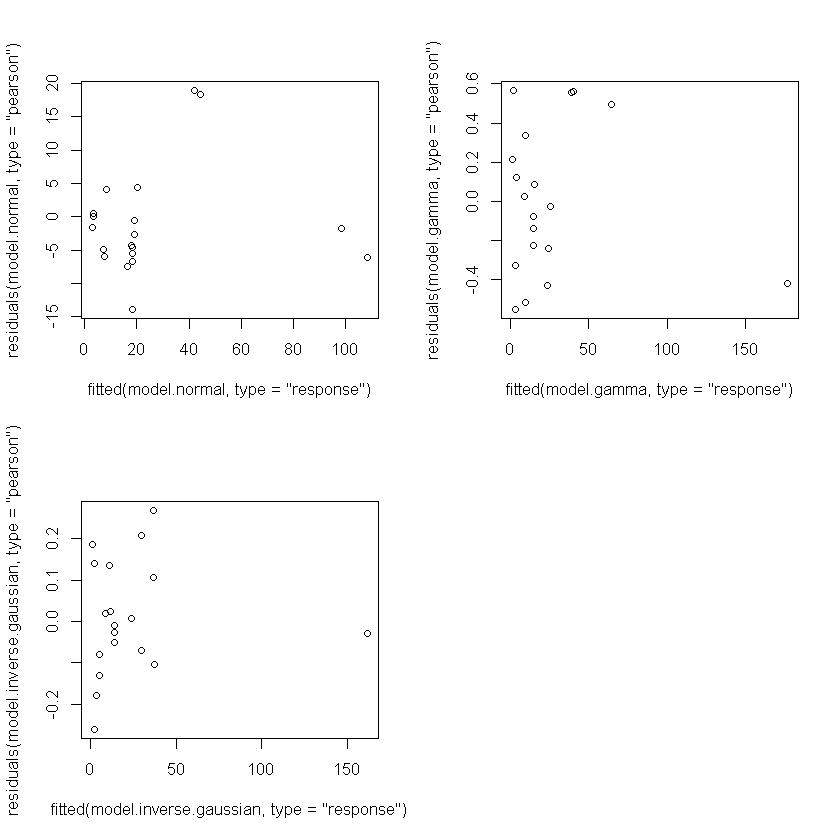

In [7]:
# e)

model.normal<-glm(Yield~Time+Temp+Methanol, family=gaussian(link="log"), data=data)
model.gamma<-glm(Yield~Time+Temp+Methanol, family=Gamma(link="log"), data=data)
model.inverse.gaussian<-glm(Yield~Time+Temp+Methanol, family=inverse.gaussian(link="log"), data=data)

par(mfrow = c(2, 2))
plot(fitted(model.normal, type="response"), residuals(model.normal, type="pearson"))
plot(fitted(model.gamma, type="response"), residuals(model.gamma, type="pearson"))
plot(fitted(model.inverse.gaussian, type="response"), residuals(model.inverse.gaussian, type="pearson"))
# iii) Inverse gaussian

mean(residuals(model.normal, type="response")^2)
mean(residuals(model.gamma, type="response")^2)
mean(residuals(model.inverse.gaussian, type="response")^2)

# > mean(residuals(model.normal, type="response")^2)
# [1] 63.19944
# > mean(residuals(model.gamma, type="response")^2) 
# [1] 409.3878
# > mean(residuals(model.inverse.gaussian, type="response")^2)
# [1] 500.145
# Gamma according to MSE


The following objects are masked from data (pos = 3):

    poison, time, treat


The following objects are masked from data (pos = 4):

    poison, time, treat




[1] 0.02189297

[1] 0.02379278

[1] 0.02535005

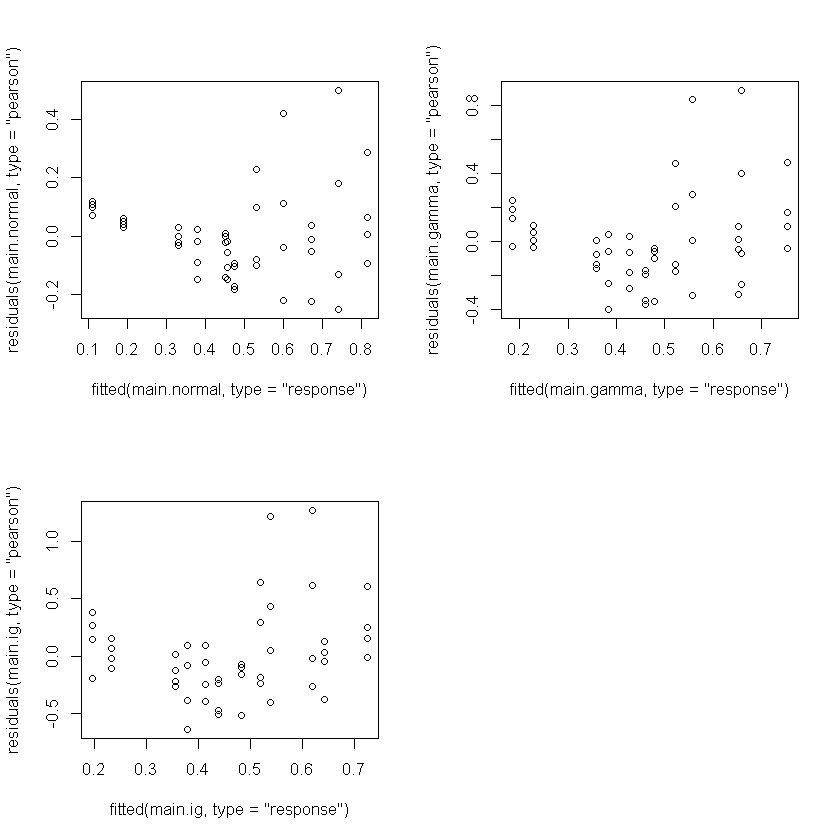

In [11]:
# 2

data<-read.table("ratstime.txt", sep="\t", dec=".", header=TRUE)
attach(data)

# a)

main.normal<-glm(time~factor(poison)+factor(treat), family=gaussian(link="identity"), data=data)
main.gamma<-glm(time~factor(poison)+factor(treat), family=Gamma(link="identity"), data=data)
main.ig<-glm(time~factor(poison)+factor(treat), family=inverse.gaussian(link="identity"), data=data)

## MSE - Mean square error

mean(residuals(main.normal, type="response")^2)
mean(residuals(main.gamma, type="response")^2)
mean(residuals(main.ig, type="response")^2)

# > mean(residuals(main.normal, type="response")^2)
# [1] 0.02189297 normal is the most suitable
# > mean(residuals(main.gamma, type="response")^2)
# [1] 0.02379278
# > mean(residuals(main.ig, type="response")^2)
# [1] 0.02535005

# Using Pearson residuals
par(mfrow = c(2, 2))
plot(fitted(main.normal, type="response"), residuals(main.normal, type="pearson"))
plot(fitted(main.gamma, type="response"), residuals(main.gamma, type="pearson"))  # normal distribution is the most suitable
plot(fitted(main.ig, type="response"), residuals(main.ig, type="pearson"))


In [12]:
# b)

gamma.identity<-glm(time~factor(poison)+factor(treat), family=Gamma(link="identity"), data=data)
gamma.log<-glm(time~factor(poison)+factor(treat), family=Gamma(link="log"), data=data)
gamma.inverse<-glm(time~factor(poison)+factor(treat), family=Gamma(link="inverse"), data=data)

## MSE - Mean square error

mean(residuals(gamma.identity, type="response")^2)
mean(residuals(gamma.log, type="response")^2)
mean(residuals(gamma.inverse, type="response")^2)

# > mean(residuals(gamma.identity, type="response")^2)
# [1] 0.02379278
# > mean(residuals(gamma.log, type="response")^2)
# [1] 0.01939997
# > mean(residuals(gamma.inverse, type="response")^2)
# [1] 0.01900666 # fits best to the data

gamma.identity$aic
gamma.log$aic
gamma.inverse$aic

# > gamma.identity$aic
# [1] -62.23033
# > gamma.log$aic
# [1] -75.26205
# > gamma.inverse$aic
# [1] -76.07749 # fits best to the data

[1] 0.02379278

[1] 0.01939997

[1] 0.01900666

[1] -62.23033

[1] -75.26205

[1] -76.07749

In [13]:
# c)

model.H0<-glm(time~factor(poison)+factor(treat), family=inverse.gaussian(link="log"), data=data)
model.H1<-glm(time~factor(poison)+factor(treat)+factor(poison):factor(treat), family=inverse.gaussian(link="log"), data=data)

## Testing Hypotheses
anova(model.H0, model.H1, test="F")
anova(model.H0, model.H1, test="F")$"F"[2] # the value of the test statistic = [1] 1.846238
anova(model.H0, model.H1, test="F")$"Pr(>F)"[2]  # p-value = [1] 0.1175517. We do not reject the null hypothesis

,Resid. Df,Resid. Dev,Df,Deviance,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,42,4.683483,NA,NA,NA,NA
2,36,3.641765,6,1.041719,1.846238,0.1175517


[1] 1.846238

[1] 0.1175517

In [14]:
# d)

gamma.log<-glm(time~factor(poison)+factor(treat), family=Gamma(link="log"), data=data)
summary(gamma.log)

newdata<-data.frame(poison="III", treat="D")
predict(gamma.log, newdata=newdata, type="response")
# point prediction
# 1 
# 0.3196688

eta.hat<-predict(gamma.log, newdata=newdata, type="link") # [1,] -1.14047
xf<-cbind(c(1,0,1,0,0,1))
# t(xf)%*%coef(gamma.log)
# [,1]
# [1,] -1.14047

# > exp(t(xf)%*%coef(gamma.log))
# [,1]
# [1,] 0.3196688

# > exp(eta.hat)
# 1 
# 0.3196688 same as point prediction

cov.eta<-as.numeric(t(xf)%*%vcov(gamma.log)%*%xf)
eta.star<-rnorm(1000, mean=eta.hat, sd=sqrt(cov.eta))
mu.star<-exp(eta.star)
var.star<-summary(gamma.log)$dispersion*mu.star^2
a.star<-(mu.star^2)/var.star
s.star<-var.star/mu.star

yf.star<-rgamma(1000, shape=a.star,scale=s.star)


## 80 % prediction interval

lower.bound<-quantile(yf.star, c(0.1))
upper.bound<-quantile(yf.star, 1-c(0.1))
lower.bound
upper.bound

# 10% 
# 0.2146948 
# > upper.bound
# 90% 
# 0.432383 


Call:
glm(formula = time ~ factor(poison) + factor(treat), family = Gamma(link = "log"), 
    data = data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.42216  -0.16456  -0.02846   0.10147   0.58524  

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -0.87536    0.08752 -10.002 1.12e-12 ***
factor(poison)II  -0.16096    0.08752  -1.839   0.0730 .  
factor(poison)III -0.78792    0.08752  -9.003 2.34e-11 ***
factor(treat)B     0.72218    0.10106   7.146 8.99e-09 ***
factor(treat)C     0.19855    0.10106   1.965   0.0561 .  
factor(treat)D     0.52281    0.10106   5.173 6.05e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Gamma family taken to be 0.06127824)

    Null deviance: 11.5710  on 47  degrees of freedom
Residual deviance:  2.4036  on 42  degrees of freedom
AIC: -75.262

Number of Fisher Scoring iterations: 5


1 
0.3196688

10% 
0.2234376

90% 
0.4311527

In [15]:
# e)

# y1f

main.gammaLog<-glm(time~poison+treat, family=Gamma(link="log"), data=data)
summary(main.gammaLog)

newdata<-data.frame(poison="I",treat="A")
pred<-predict(main.gammaLog, newdata=newdata, type="response") # point prediction = 0.4167128 

eta.hat<-predict(main.gammaLog, newdata=newdata, type="link")
#coef(main.gammaLog)
xf<-t(cbind(1,0,0,0,0,0))
cov.eta<-as.numeric(t(xf)%*%vcov(main.gammaLog)%*%xf)
eta.star<-rnorm(1000, mean=eta.hat, sd=sqrt(cov.eta))
mu.star<-exp(eta.star)
var.star<-summary(main.gammaLog)$dispersion*mu.star^2
a.star<-(mu.star^2)/var.star
s.star<-var.star/mu.star

y1f.star<-rgamma(1000, shape=a.star,scale=s.star)


# y2f

newdata<-data.frame(poison="III",treat="D")
pred<-predict(main.gammaLog, newdata=newdata, type="response") # point prediction = 0.3196688 

eta.hat<-predict(main.gammaLog, newdata=newdata, type="link")
#coef(main.gammaLog)
xf<-t(cbind(1,0,1,0,0,1))
cov.eta<-as.numeric(t(xf)%*%vcov(main.gammaLog)%*%xf)
eta.star<-rnorm(1000, mean=eta.hat, sd=sqrt(cov.eta))
mu.star<-exp(eta.star)
var.star<-summary(main.gammaLog)$dispersion*mu.star^2
a.star<-(mu.star^2)/var.star
s.star<-var.star/mu.star

y2f.star<-rgamma(1000, shape=a.star,scale=s.star)

diff.star<-y2f.star-y1f.star

lower.bound<-quantile(diff.star, c(0.025,0.05,0.1,0.15,0.2,0.25))
upper.bound<-quantile(diff.star, 1-c(0.025,0.05,0.1,0.15,0.2,0.25))
lower.bound
upper.bound

#       2.5%         5%        10%        15%        20%        25% 
#   -0.3842133 -0.3429482 -0.2800530 -0.2472719 -0.2177080 -0.1955294 
# > upper.bound
#       97.5%        95%        90%        85%        80%        75% 
#   0.17676023 0.13464863 0.09145587 0.05099354 0.02264252 0.00102374


Call:
glm(formula = time ~ poison + treat, family = Gamma(link = "log"), 
    data = data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.42216  -0.16456  -0.02846   0.10147   0.58524  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.87536    0.08752 -10.002 1.12e-12 ***
poisonII    -0.16096    0.08752  -1.839   0.0730 .  
poisonIII   -0.78792    0.08752  -9.003 2.34e-11 ***
treatB       0.72218    0.10106   7.146 8.99e-09 ***
treatC       0.19855    0.10106   1.965   0.0561 .  
treatD       0.52281    0.10106   5.173 6.05e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Gamma family taken to be 0.06127824)

    Null deviance: 11.5710  on 47  degrees of freedom
Residual deviance:  2.4036  on 42  degrees of freedom
AIC: -75.262

Number of Fisher Scoring iterations: 5


2.5%         5%        10%        15%        20%        25% 
-0.3681806 -0.3226667 -0.2833479 -0.2473041 -0.2233638 -0.1929850

97.5%          95%          90%          85%          80%          75% 
 0.161379624  0.103976225  0.054132806  0.026417894  0.008172039 -0.017706553